In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from lazypredict.Supervised import LazyClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Read the dataset
df = pd.read_csv('UCI_Credit_Card.csv')
df.shape

(30000, 25)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.00,2,2,1,24,2,2,-1,-1,...,0.00,0.00,0.00,0.00,689.00,0.00,0.00,0.00,0.00,1
1,2,120000.00,2,2,2,26,-1,2,0,0,...,3272.00,3455.00,3261.00,0.00,1000.00,1000.00,1000.00,0.00,2000.00,1
2,3,90000.00,2,2,2,34,0,0,0,0,...,14331.00,14948.00,15549.00,1518.00,1500.00,1000.00,1000.00,1000.00,5000.00,0
3,4,50000.00,2,2,1,37,0,0,0,0,...,28314.00,28959.00,29547.00,2000.00,2019.00,1200.00,1100.00,1069.00,1000.00,0
4,5,50000.00,1,2,1,57,-1,0,-1,0,...,20940.00,19146.00,19131.00,2000.00,36681.00,10000.00,9000.00,689.00,679.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
#Check statistical measures of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.00,15000.50,8660.40,1.00,7500.75,15000.50,22500.25,30000.00
LIMIT_BAL,30000.00,167484.32,129747.66,10000.00,50000.00,140000.00,240000.00,1000000.00
SEX,30000.00,1.60,0.49,1.00,1.00,2.00,2.00,2.00
EDUCATION,30000.00,1.85,0.79,0.00,1.00,2.00,2.00,6.00
MARRIAGE,30000.00,1.55,0.52,0.00,1.00,2.00,2.00,3.00
AGE,30000.00,35.49,9.22,21.00,28.00,34.00,41.00,79.00
PAY_0,30000.00,-0.02,1.12,-2.00,-1.00,0.00,0.00,8.00
PAY_2,30000.00,-0.13,1.20,-2.00,-1.00,0.00,0.00,8.00
PAY_3,30000.00,-0.17,1.20,-2.00,-1.00,0.00,0.00,8.00
PAY_4,30000.00,-0.22,1.17,-2.00,-1.00,0.00,0.00,8.00


In [6]:
#Check Null Values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
#Check Duplicate Values
df.duplicated().sum()

0

In [8]:
#Check unique values
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

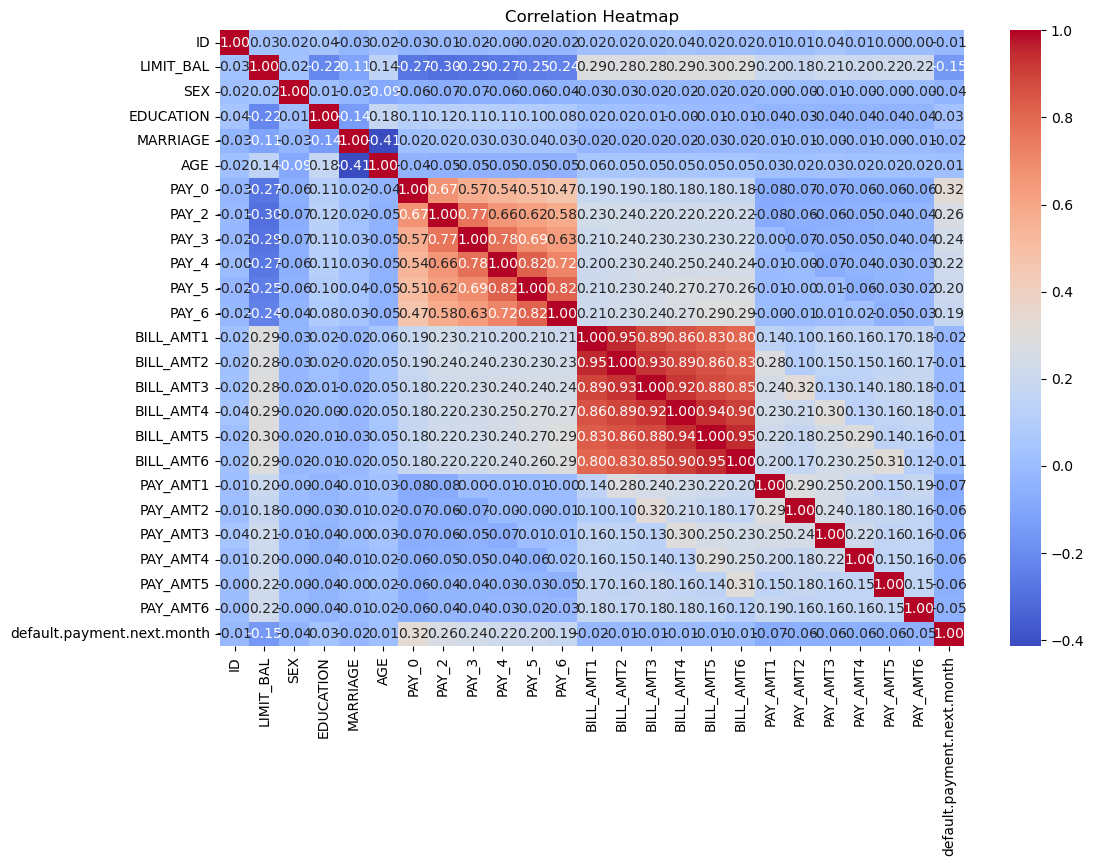

In [9]:
#Draw heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

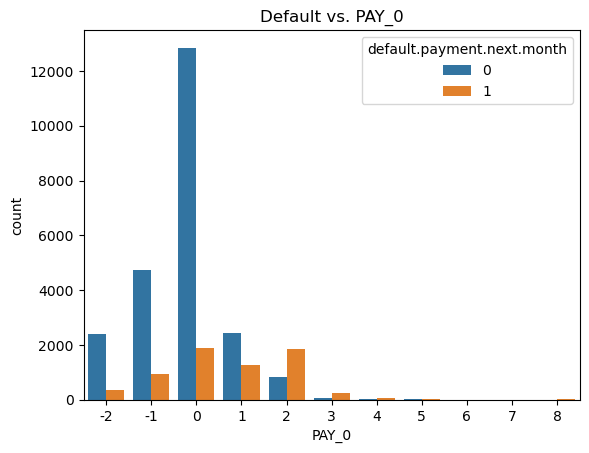

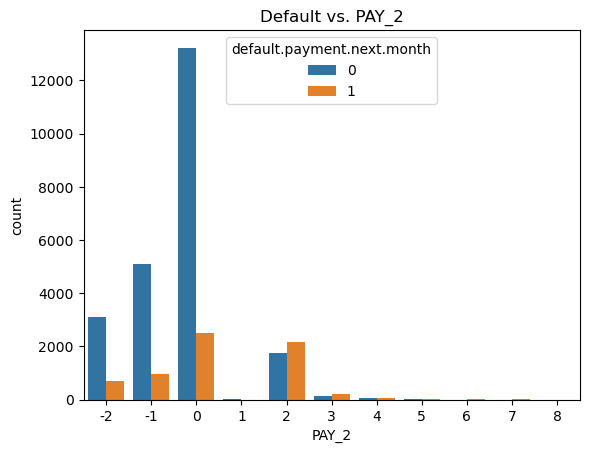

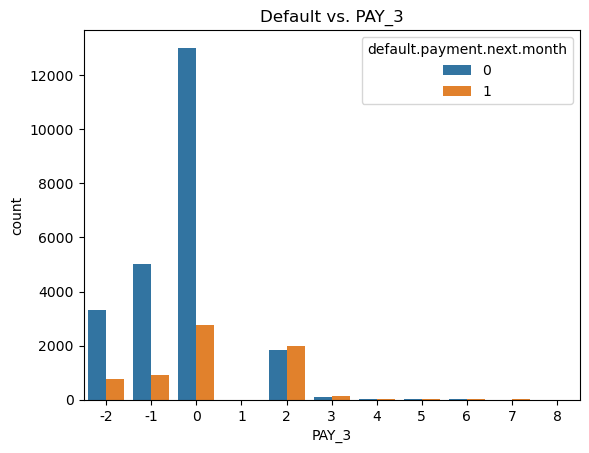

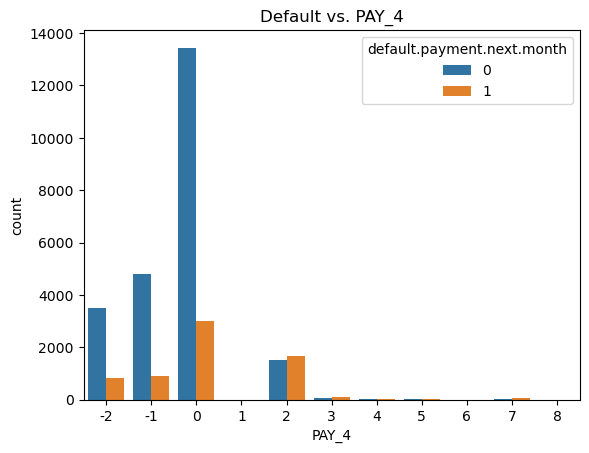

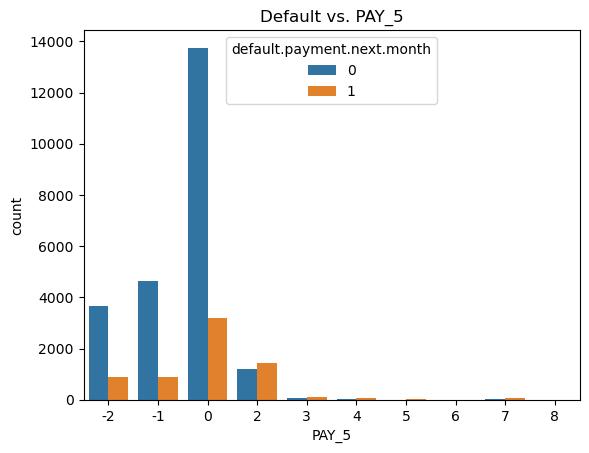

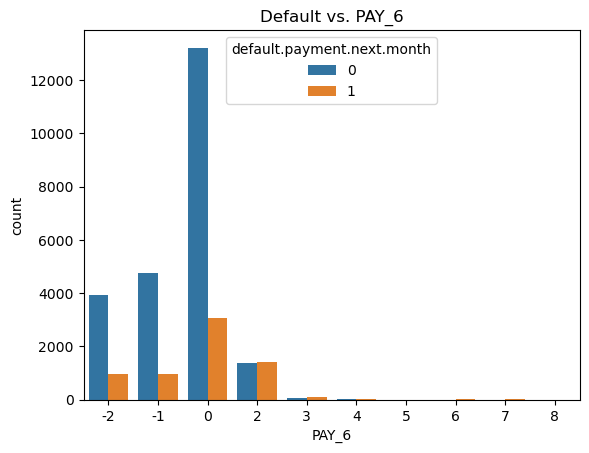

In [10]:
payment_history_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for col in payment_history_columns:
    sns.countplot(x=col, hue='default.payment.next.month', data=df)
    plt.title(f'Default vs. {col}')
    plt.show()

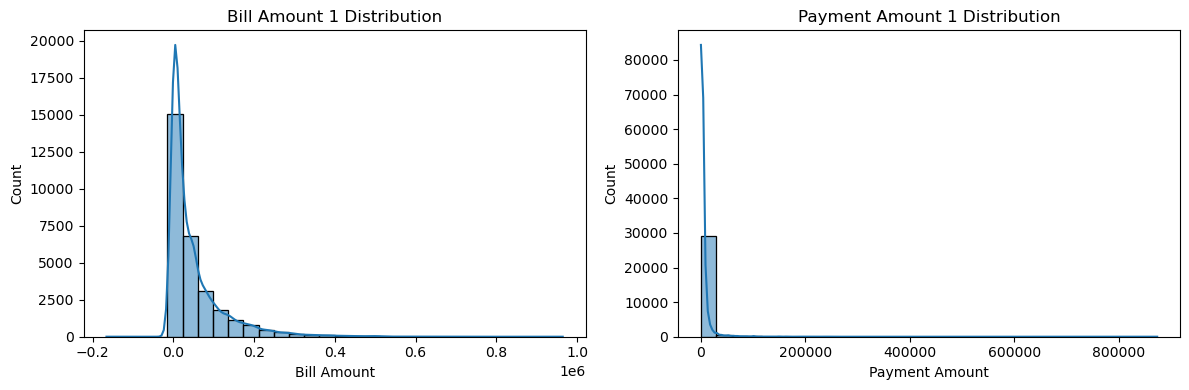

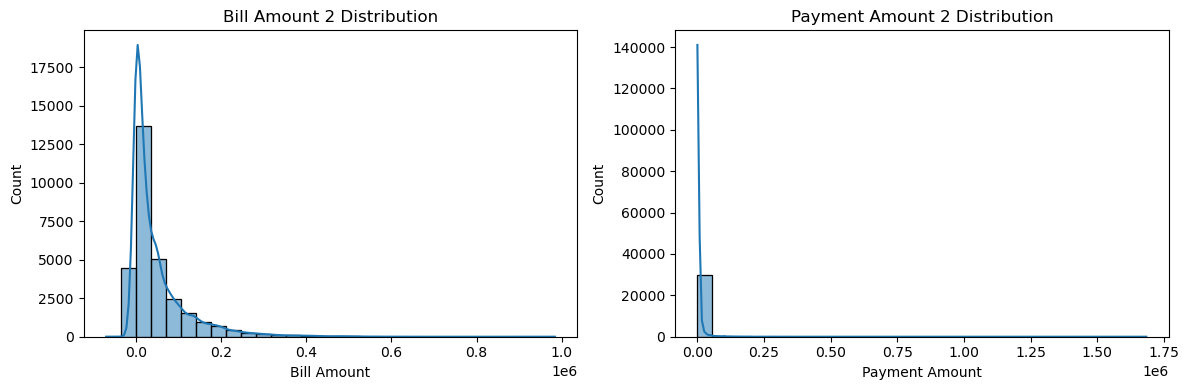

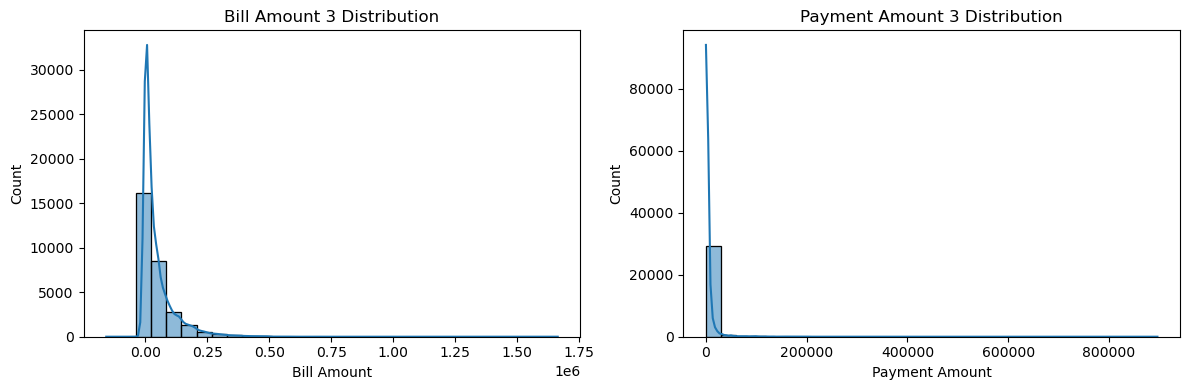

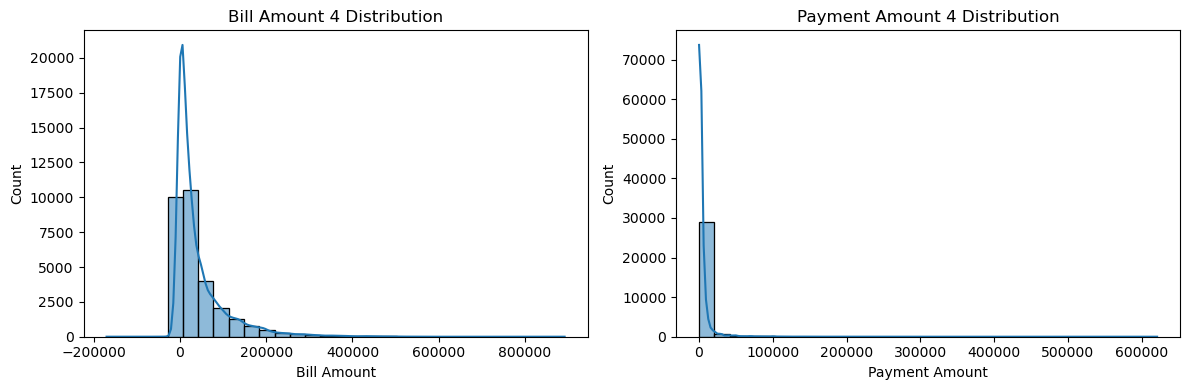

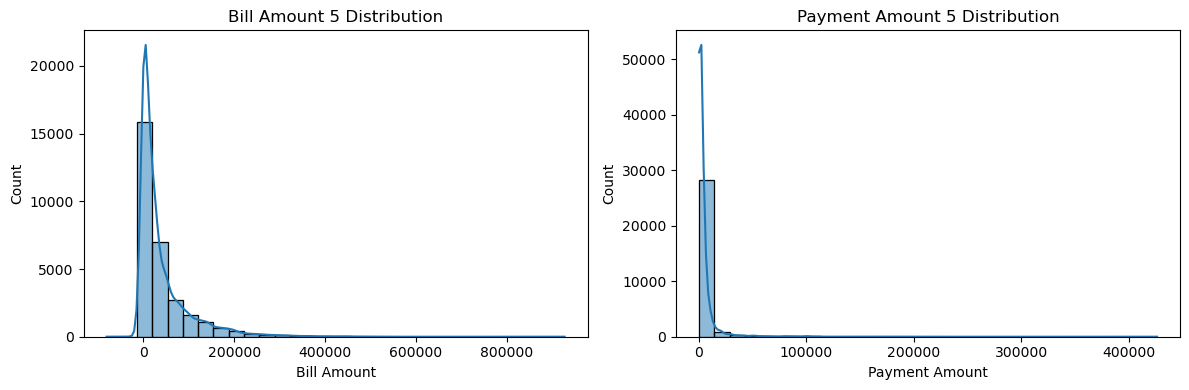

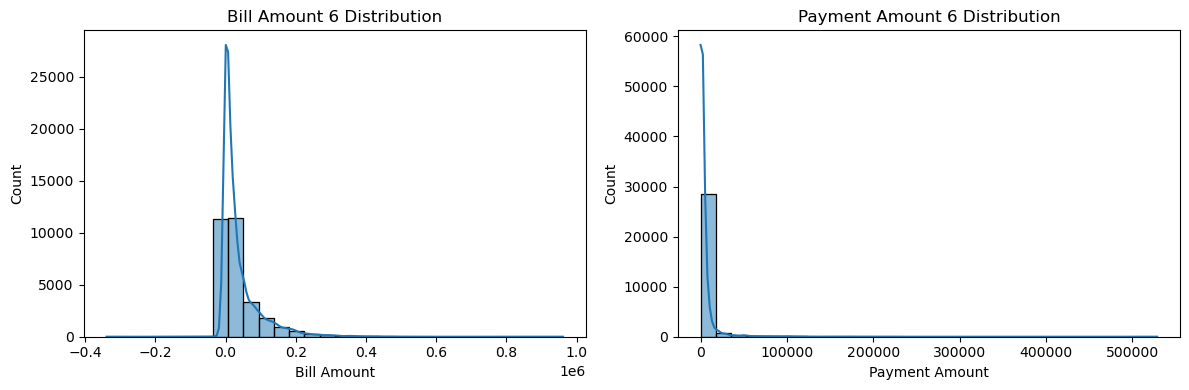

In [11]:
for i in range(1, 7):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[f'BILL_AMT{i}'], bins=30, kde=True)
    plt.title(f'Bill Amount {i} Distribution')
    plt.xlabel('Bill Amount')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.histplot(df[f'PAY_AMT{i}'], bins=30, kde=True)
    plt.title(f'Payment Amount {i} Distribution')
    plt.xlabel('Payment Amount')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()


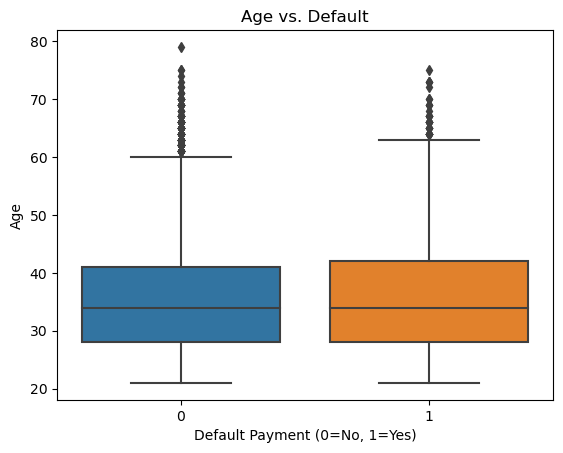

In [12]:
sns.boxplot(x='default.payment.next.month', y='AGE', data=df)
plt.title('Age vs. Default')
plt.xlabel('Default Payment (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

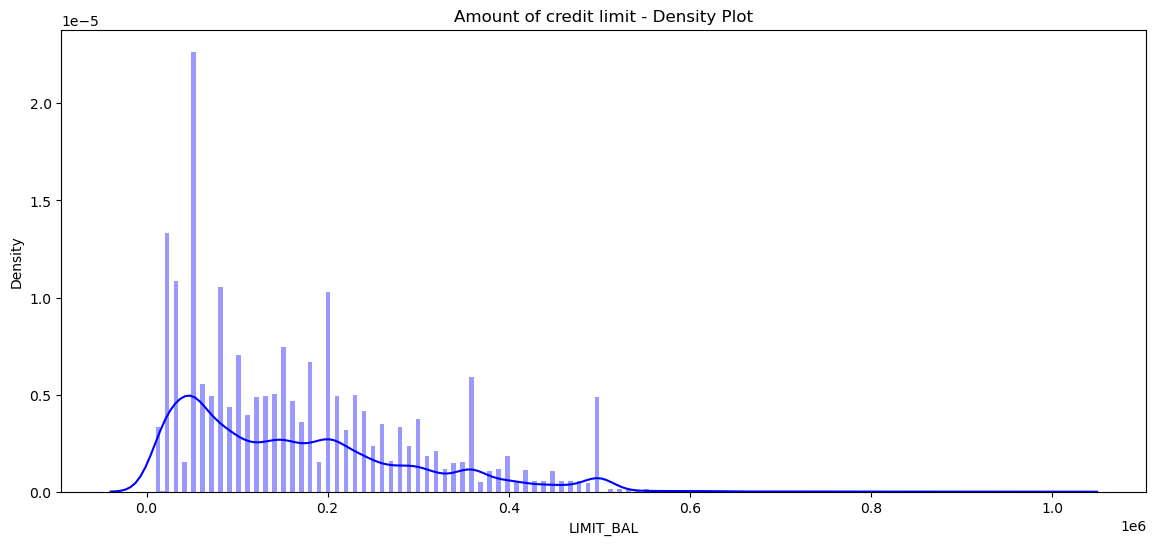

In [13]:
#Draw Density plot
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

In [14]:
df['LIMIT_BAL'].value_counts().head(5)

50000.00     3365
20000.00     1976
30000.00     1610
80000.00     1567
200000.00    1528
Name: LIMIT_BAL, dtype: int64

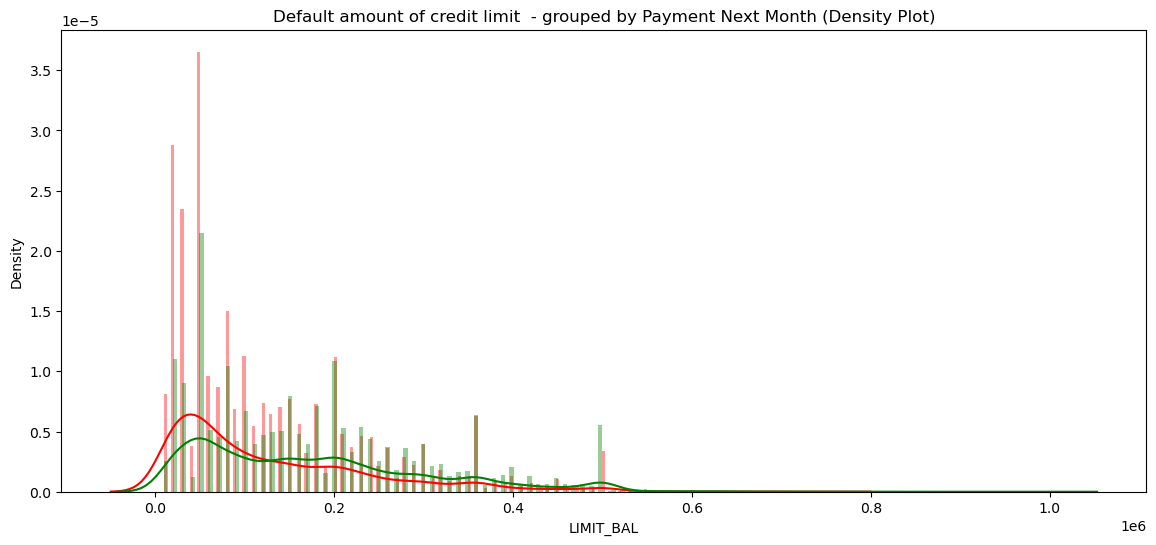

In [15]:
class_0 = df.loc[df['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

In [16]:
#Drop unnecessary columns
df = df.drop('ID', axis = 'columns')

In [17]:
df.sample()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
2184,50000.00,1,1,1,42,0,0,0,-2,-2,...,-1000.00,-1000.00,0.00,3000.00,220.00,780.00,0.00,1000.00,0.00,0


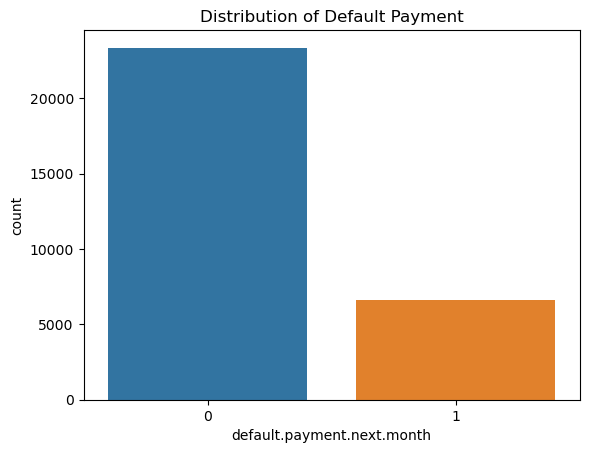

In [18]:
# Check the distribution of the target variable
sns.countplot(x='default.payment.next.month', data=df)
plt.title('Distribution of Default Payment')
plt.show()

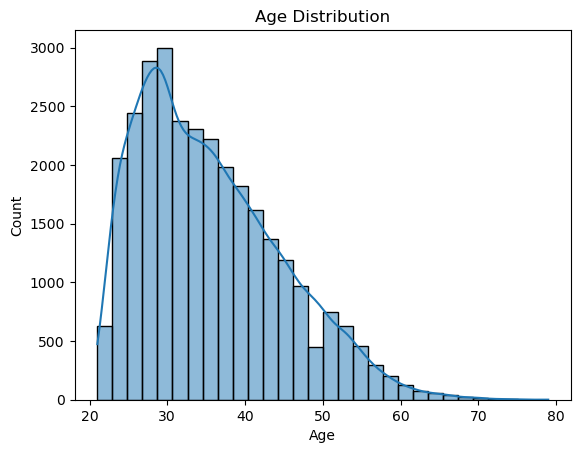

In [19]:
# Explore the distribution of features, e.g., age
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<AxesSubplot:>

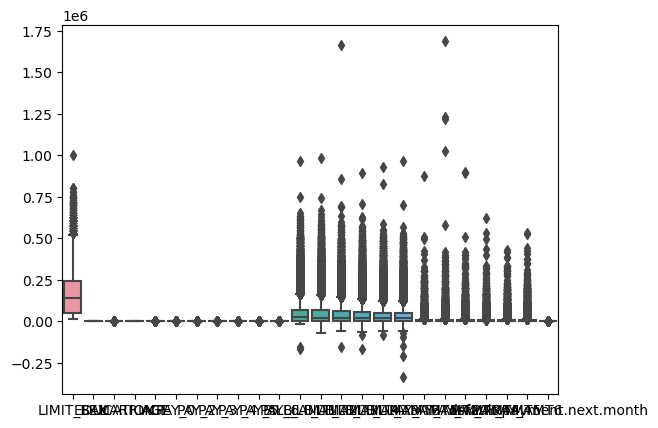

In [20]:
#Draw Boxplot to check outliers
sns.boxplot(data=df)

In [26]:
# Separate features and target variable
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 23)
(6000, 23)
(24000,)
(6000,)


In [28]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)

Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [29]:
#Check Feature Importance
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
PAY_0       0.65
BILL_AMT1   0.37
PAY_AMT2    0.25
PAY_AMT1    0.18
BILL_AMT2   0.14
PAY_2       0.11
LIMIT_BAL   0.11
BILL_AMT3   0.11
MARRIAGE    0.08
EDUCATION   0.08
PAY_3       0.08
AGE         0.08
BILL_AMT4   0.06
PAY_AMT4    0.06
SEX         0.06
PAY_4       0.05
PAY_AMT6    0.05
BILL_AMT5   0.04
PAY_AMT3    0.03
BILL_AMT6   0.02
PAY_AMT5    0.02
PAY_5       0.02
PAY_6       0.02
dtype: float64


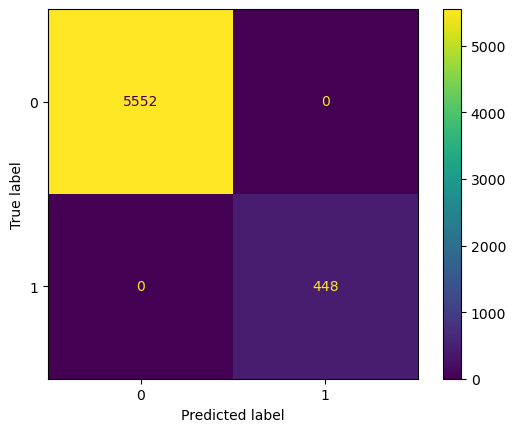

In [30]:
#Draw Confusion matrix
plot_confusion_matrix(model, X_test_scaled, y_pred)

In [31]:
cla = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = cla.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [05:11<00:00, 10.73s/it]


In [32]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.71,0.69,0.69,0.73,0.10
LGBMClassifier,0.82,0.66,0.66,0.80,0.89
SGDClassifier,0.81,0.65,0.65,0.79,1.05
RandomForestClassifier,0.82,0.65,0.65,0.80,16.17
ExtraTreesClassifier,0.81,0.65,0.65,0.79,4.42
NearestCentroid,0.66,0.65,0.65,0.69,0.12
XGBClassifier,0.82,0.65,0.65,0.80,1.95
SVC,0.82,0.64,0.64,0.79,86.74
KNeighborsClassifier,0.80,0.64,0.64,0.78,4.63


In [33]:
import pickle

In [34]:
pickle.dump(model, open('LogR_Model.pkl','wb'))